<a href="https://colab.research.google.com/github/adib2006/Knight-in-Training/blob/master/HW3_Blank_HINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS97 HW3 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## 0.1. Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## 0.2. Loading Essentials and Helper Functions 

In [ ]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [ ]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20pt] Part 1.  Load the Data and Analyze

### 1.1. Let's first load our dataset (heartdisease.csv) so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [ ]:
'''NOTE FROM TA's'''
'''Please use this website https://htmtopdf.herokuapp.com/ipynbviewer/
  to convert ipynb file of this colab (File -> download as ipynb) to pdf, 
  instead of ctrl+p this page because it will not format beutifully
  and it'll be difficult for us to grade'''

''' your code goes below here'''
from google.colab import drive
drive.mount('/content/drive')
import pandas
heartdata = pandas.read_csv('/content/drive/MyDrive/heartdisease.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2. Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method and the describe method to display some of the rows and undertand the summary of statistics.

In [ ]:
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [ ]:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### 1.3. Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

In [ ]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


[Use this area to describe any fields you believe will be problemmatic and why? Hint: we can handle numeric variables, such as int and float.] E.g., All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

### 1.4. Determine if we're dealing with any null values. If so, report on which columns? 

In [ ]:
heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

[Discuss here]

**Answer: No**

### 1.5. Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean 'sick' variable into a binary numeric target variable (values of either '0' or '1'), name it as 'target', and then drop the original 'sick' datafield from the dataframe. (hint: try label encoder or .astype()

In [ ]:
heartdata['target'] = (heartdata['sick']).astype(int)
del heartdata['sick']

In [ ]:
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### 1.6. Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4330d5dc50>,
      dtype=object)

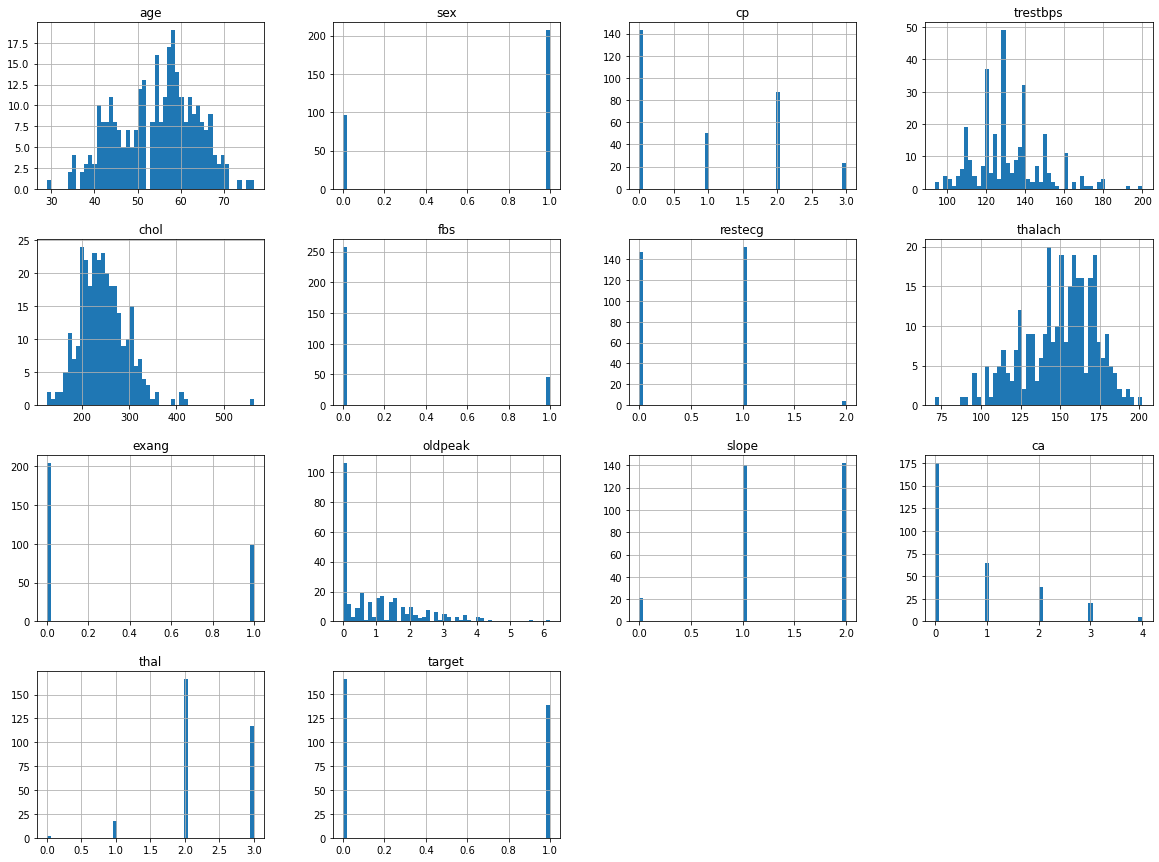

In [ ]:
# hint data.hist() check HW1
heartdata.hist(bins=50, figsize=(20,15))

### 1.7. We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

0    165
1    138
Name: target, dtype: int64

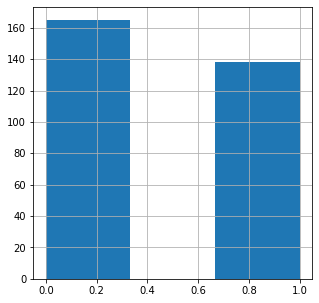

In [ ]:
#data['target'].hist
#data['target'].value_counts()
heartdata['target'].hist(bins = 3, figsize=(5,5))
heartdata['target'].value_counts()

[Include description of findings here]

**Answer: The class distribution is almost equal. It is only off by 27.**

### 1.8. What if the labels are not balanced? Can you name one possible solution to address it?

[Discuss prompt here] 

**Answer: The accuracy might be good, the recall and precision might be bad. It becomes harder to predict inbalanced classes. One solution is to bootstrap and oversample the underrepresented classes.**

### 1.9. Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value.  (hint: one possible approach you can use is corr() method from HW1)

In [ ]:
#get the corr_matrx usign corr()
corr_matrix = heartdata.corr()

In [ ]:
# get the correlations specific to target and sort them in descending order
corr_matrix['target'].sort_values(ascending = False)

target      1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: target, dtype: float64

[Discuss correlations here] 

**Answer: It looks likes restecg, trestbps, chol, and fbs seem to be very weakly correlated with target while all the other columns seem to be moderately correlated.**

## [25pt] Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### 2.1. Save the label column as a separate array (let's name it as data_target) and then drop it from the dataframe. 

In [ ]:
target_name = 'target'
heartdata_target = heartdata[target_name]
heartdata = heartdata.drop([target_name], axis = 1)

### 2.2. First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method) 

In [ ]:
train_raw, test_raw, target_raw, target_raw_test = train_test_split(heartdata, heartdata_target, test_size = 0.2, random_state = 30)

In [ ]:
print(train_raw.shape)
print(test_raw.shape)
print(target_raw.shape)
print(target_raw_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### 2.3. Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [ ]:
print(train_raw.shape, target_raw.shape)
print(test_raw.shape, target_raw_test.shape)

(242, 13) (242,)
(61, 13) (61,)


### 2.4. In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings (K=5). Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [ ]:
# KNN algorithm KNeighborsClassifier()
'''
1.) create KNeighborsClassifier() object
2.) fit data
3.) predict the test data, and assign to variable "raw_predicted" since we provide the template in below cell
'''
''' your code goes below here'''

knnclassifier = KNeighborsClassifier()
knnclassifier.fit(train_raw, target_raw)
raw_predicted = knnclassifier.predict(test_raw)
raw_predicted


array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

### 2.5. Report on the accuracy of the resulting model.

In [ ]:
# use metrics.accuracy_score()
'''uncomment this below line to print accuracy'''
print('Accuracy:', metrics.accuracy_score(target_raw_test,raw_predicted))

Accuracy: 0.6065573770491803


#### report other metrics and draw confusion matrix using the helper function defined in the beginning

Precision:   0.500000
Recall:      0.791667
F1 Score:    0.612903
Confusion Matrix: 



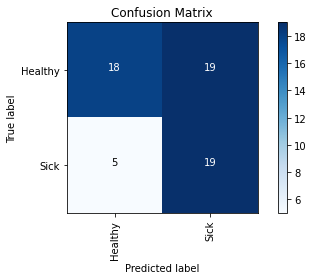

In [ ]:
print("%-12s %f" % ('Precision:', metrics.precision_score(target_raw_test, raw_predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(target_raw_test, raw_predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_raw_test, raw_predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))

print("Confusion Matrix: \n")
draw_confusion_matrix(target_raw_test, raw_predicted, ['Healthy', 'Sick'])

### 2.6. Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Please refer to HW1 (note you don't have to do data augmentation here).

#### Pipeline:

In [ ]:
''' don't forget to drop binary data when doing scaling(i.e. sex, since it is 0 and 1) '''
''' your code goes below here'''
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

imp = SimpleImputer()
num_pipeline = Pipeline([('imputer', imp), ('scaler', StandardScaler())])
cat_encoder = OneHotEncoder(drop = 'first')
full_pipeline = ColumnTransformer([
     ('num', num_pipeline, heartdata._get_numeric_data().columns),
     ('cat', cat_encoder, heartdata.select_dtypes(['object']).columns)
    ])

#### take a look at your prepared data

In [ ]:
heart_prepared = full_pipeline.fit_transform(heartdata)
heart_prepared

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### 2.7. Now split your pipelined data into an 80/20 split and again run the same KNN, and report out on it's accuracy. Discuss the implications of the different results you are obtaining.

#### split your data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart_prepared, heartdata_target, test_size = 0.2, random_state = 30)

####  run KNN and report accuracy, precision, recall, and confusion matrix.

In [ ]:
# KNN algorithm KNeighborsClassifier()
'''
1.) create KNeighborsClassifier() object
2.) fit data
3.) predict the test data, and assign to variable "predicted" since we provide the template in below cell
'''
''' your code goes below here'''
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
#feel free to use this helper function to print accuracy, precision, recall, F1
def print_4_metrics(target_test, predicted):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))


Accuracy:    0.819672
Precision:   0.724138
Recall:      0.875000
F1 Score:    0.792453


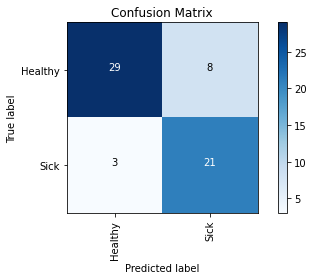

In [ ]:
#use sklearn metrics to display metrics values-> metrics.accuracy_score()
'''print out metrics here'''
print_4_metrics(y_test, knn_pred)

'''end printing out metrics'''
draw_confusion_matrix(y_test, knn_pred, ['Healthy', 'Sick'])


[Discuss Results here]

**Answer: We have 3 false positives and 8 false negatives. It seemed to perform pretty well.**

### 2.8. Model Selection on K.  As discussed in class, the KNN Algorithm includes an n_neighbors (k) attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n_neighbors (k) values of: 1, 2, 3, 5, 7, 9, 10, 20, and 200. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [ ]:
k_values = [1,2,3,5,7,9,10,20,200]

for k in k_values:
    # run knn here:
    # note: when create KNN object, assign parameter "n_neighbors" to k
    # referece: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    '''your code goes below here'''
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)

    # report the accuracy here:
    # note: print out k value and use metrics.accuracy_score() do show accuracy
    '''your code goes below here'''
    print(k, metrics.accuracy_score(y_test, knn_pred))
    

1 0.6885245901639344
2 0.7377049180327869
3 0.8032786885245902
5 0.819672131147541
7 0.819672131147541
9 0.819672131147541
10 0.819672131147541
20 0.8524590163934426
200 0.7868852459016393


## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

## 3. Linear Decision Boundary Methods 

### [25pt] 3.1. Logistic Regression

Let's now try another classifier, we introduced in lecture, one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### 3.1.1. Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. Report accuracy, precision, Recall, F1 score, plot the resulting ROC curve, and report area under ROC curve.

In [ ]:
# run logistic regression here
'''
1.) create LogisticRegression() object
2.) fit your train data
3.) predict the test data, and assign to variable "log_predicted" 
  since we will use it in below cell
4.) use log_reg.predict_proba(test)[:,1] and assign to variable "log_score"
  NOTE: predict_proba() will return 
  [probability of data belongs to class 0, probability of data belongs to class 1]
  and we want to get probability of data belongs to class 1. That's why we slice
  the array by only getting the column 1
  NOTE: predict() returns 0 or 1, while predict_proba() returns float between 0 and 1
'''
'''your code below here'''
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)[:,1]

In [ ]:
# report accuracy, precision, Recall, and F1 score
print_4_metrics(y_test, log_reg_pred)

Accuracy:    0.868852
Precision:   0.785714
Recall:      0.916667
F1 Score:    0.846154


Logistic Model Performance Results:

AUC of ROC:  0.9279279279279279


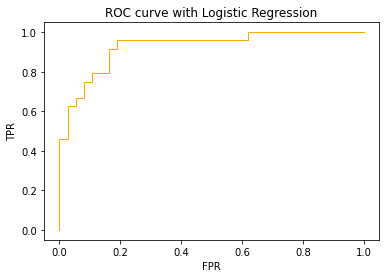

In [ ]:
# Plot ROC curve and report area under ROC
# use metrics.roc_curve(your y_test, predicted probabilities for y_test)

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test,log_score)
print("Logistic Model Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')



# report auc 
# use metrics.auc(fpr, tpr)
aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC: ', aucroc)


Confusion Matrix: 



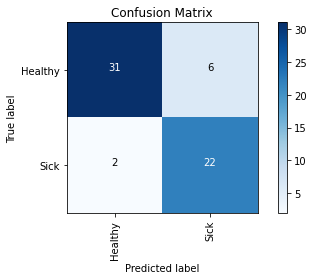

In [ ]:
print("Confusion Matrix: \n")
draw_confusion_matrix(y_test, log_reg_pred, ['Healthy', 'Sick'])

### 3.1.3. Let's tweak a few settings. First let's set penalty = 'none' and rerun your model. Let's see how your results change!

In [ ]:
# run logistic regression here 
'''
1.) create LogisticRegression() object, while specify its parameter "penalty" to "none"
2.) fit your train data
3.) predict the test data, and assign to variable "log_predicted" 
  since we will use it in below cell
4.) use log_reg.predict_proba(test)[:,1] and assign to variable "log_score"
'''
'''your code goes here'''

log_reg = LogisticRegression(penalty = 'none')
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)[:,1]

In [ ]:
# report accuracy and F1 score
print_4_metrics(y_test, log_reg_pred)

Accuracy:    0.852459
Precision:   0.758621
Recall:      0.916667
F1 Score:    0.830189


Logistic Model Performance Results:

AUC of ROC:  0.9279279279279279


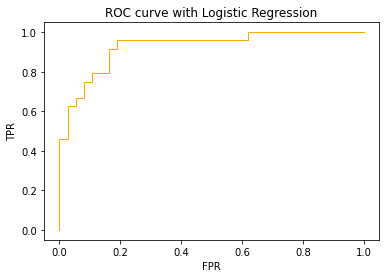

In [ ]:
# Plot ROC curve and report area under ROC
# use metrics.roc_curve(your y_test, predicted probabilities for y_test)
# feel free to use the same code from 3.1.1
'''plotting code goes here'''
fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test,log_score)
print("Logistic Model Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

'''end plotting code'''
# report auc 
# use metrics.auc(fpr, tpr)
aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC: ', aucroc)


### 3.1.4 Rerun your logistic classifier, but modify the penalty = 'l1', solver = 'liblinear', and again report the results.

Accuracy:    0.852459
Precision:   0.758621
Recall:      0.916667
F1 Score:    0.830189
Logistic Model Performance Results:

AUC of ROC:  0.9279279279279279


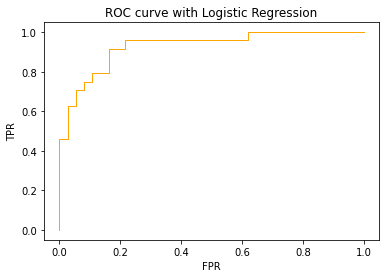

In [ ]:
''' repeat the same process as 3.1.3 but change parameters as the question specifies'''
# run logistic regression here 
log_reg = LogisticRegression(penalty = 'l1', solver = 'liblinear')
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_score = log_reg.predict_proba(X_test)[:,1]

# report accuracy and F1 score
print_4_metrics(y_test, log_reg_pred)

# Plot ROC curve and report area under ROC
# use metrics.roc_curve(your y_test, predicted probabilities for y_test)
fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test,log_score)
print("Logistic Model Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

# report auc 
# use metrics.auc(fpr, tpr)
aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
print('AUC of ROC: ', aucroc)


###  3.1.5. We played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term. Does it improve results in our case?

In [ ]:
#Hint: do you see any zeros? Those are related to the penalty terms.
#print model.coef_
log_reg.coef_

array([[ 3.90424106e-04,  7.34033106e-01, -9.05905900e-01,
         2.91591358e-01,  2.46680407e-01,  3.08643333e-02,
        -1.42425149e-01, -4.19529830e-01,  4.01220744e-01,
         6.04688949e-01, -4.71574354e-01,  8.21214083e-01,
         4.97687646e-01]])

[Discuss prompt here]

**Answer: The purpose of penalty terms is regularization, which prevents overfitting. It did not improve the results.**

### [20pt] 3.2. SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### 3.2.1 Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [ ]:
# run SVM
'''
1.) create SVC() object, while specify its parameter "probability" to "True"
2.) fit your train data
3.) predict the test data. and assign to a variable  
  because we will use it in below cell
4.) use svm.predict_proba(test)[:,1] and assign to a variable
  because we will use it in below cell
'''
'''your code goes below here'''
svm = SVC(probability = True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_score = svm.predict_proba(X_test)[:,1]

### 3.2.2 Report the accuracy, precision, recall, F1 Score, and ROC Curve of the resulting model.

Accuracy:    0.803279
Precision:   0.700000
Recall:      0.875000
F1 Score:    0.777778
SVM Performance Results:

AUC of ROC:  0.9042792792792793


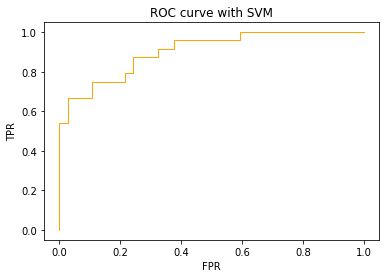

In [ ]:
# report accuracy and F1 score
# feel free to use print_4_metrics()
'''your code goes below here'''
print_4_metrics(y_test, svm_pred)

# Plot ROC curve and report area under ROC
# use metrics.roc_curve(your y_test, predicted probabilities for y_test)
# feel free to use the same code as 3.1.1.
'''your code goes below here'''
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, svm_score)
print("SVM Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='orange', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

# report auc 
# use metrics.auc(fpr, tpr)
aucroc = metrics.auc(fpr_svm, tpr_svm)
print('AUC of ROC: ', aucroc)

### 3.2.3.  Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and plot the new ROC curve.  

In [ ]:
# run SVM
'''
1.) create SVC() object like 3.2.2, but change parameter 'kernel' to 'linear' as the question specifies
2.) fit your train data
3.) predict the test data. and assign to a variable  
  because we will use it in below cell
4.) use svm.predict_proba(test)[:,1] and assign to a variable
  bacause we will use it in below cell
'''
''' your code goes below here'''
svm = SVC(kernel = 'linear', probability = True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_score = svm.predict_proba(X_test)[:,1]



Accuracy:    0.852459
Precision:   0.800000
Recall:      0.833333
F1 Score:    0.816327
SVM Performance Results:

AUC of ROC:  0.9211711711711712


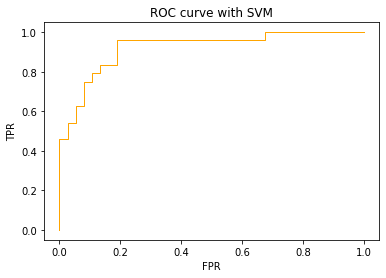

In [ ]:
''' repeat the same process as 3.2.2'''
# report accuracy and F1 score

# Plot ROC curve and report area under ROC
# use metrics.roc_curve(your y_test, predicted probabilities for y_test)
print_4_metrics(y_test, svm_pred)

'''your code goes below here'''
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, svm_score)
print("SVM Performance Results:\n")
pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='orange', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

# report auc 
# use metrics.auc(fpr, tpr)
aucroc = metrics.auc(fpr_svm, tpr_svm)
print('AUC of ROC: ', aucroc)

### 3.2.4 Explain what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed. (HINT: changed default kernel to linear kernel)

[Discuss Prompt here]

**Answer: Previously, the default kernel was the radial basis fuction which made the decision boundary a hyper sphere. The linear kernel makes the data linearly seperable so now the decision is a hyper plane. Because we are changing the decision boudary, it makes a great impact on our results**

## [10pt + bonus 10pt] Part 4: Cross Validation and Model Selection

You've sampled a number of different classification techniques, as well as experimented with tweak different parameters to optimize perfiormance. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset. 

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for our particular data. 

## [10pt] 4.1. Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Replace the corresponding code in the cell below. Report your best performing model. 

In [ ]:
from sklearn.model_selection import KFold
from sklearn import model_selection

# First we define our cross-validation model parameters. In this case we're going to use KFold, with 10 splits
# where we first shuffle our data before splitting it, and use a random seed to ensure a consistent repeatable shuffle
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 

# replace the two models below with what you picked
log_model_kfold = LogisticRegression()
svc_model_kfold = SVC(kernel = "linear", probability = True)

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
log_results_kfold = model_selection.cross_val_score(log_model_kfold, heart_prepared, heartdata_target, cv=kfold)
svc_results_kfold = model_selection.cross_val_score(svc_model_kfold, heart_prepared, heartdata_target, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("For Logistic Regression our mean accuracy across folds is: %.2f%%" % (log_results_kfold.mean()*100.0)) 
print("For an SVM Regression our mean accuracy across folds is: %.2f%%" % (svc_results_kfold.mean()*100.0)) 

For Logistic Regression our mean accuracy across folds is: 82.17%
For an SVM Regression our mean accuracy across folds is: 83.49%


[Discuss]

**Answer: My best reporting model was the SVM with a linear kernel with an 83.49% accuracy averaged across the 10 folds**

## [bonus 10pt] 4.2. use 10-fold cross validation to select the best hyperparameter $\lambda$ (1/C) in logistic regression with l2 penalty.

In [ ]:
'''
  This is similar to 4.1
  Hint: create a bunch of lambdas value range from (0,some large number)
  then when you for loop to create LogisticRegression(), 
  assign parameter "C" to be "1/(one particular lambda)"
  and print out cross_val_score().
  Also, specify which lambda is the best one in your opinion
'''